# Open CVで顔判定してみよう 
## ~ PyLadies Caravan in ehime ~

## この章でやること
* Open CV とは
* 画像編集入門
    * ファイルの読み書き
    * カラースケールの変化
    * 画像のリサイズ
* プリセットを利用した顔検知
* 画像の位置指定合成
    
上記の技術を利用して、下記処理を実装します。    
1. 写真の中から顔を検出する
2. 検出した顔にPyLadies Tokyoのマスコットの顔を上書きする

## この章でやらないこと
1.   機械学習系機能の説明
2.   NumpyなどのOpenCV以外のライブラリの説明(できる前提で進めます)

# 1. ファイルの読み書き
OpenCVで画像処理を行うためには、まず普段皆さんが見ている画像ファイルをOpenCVが処理できる形に処理してあげるところから始まります。    
    
ファイルを読み込むimread, ファイルを書きだすimwriteはJupyter上でも.pyファイル上でも同じ書き方をしますが、
現在処理しているファイルの確認を行う場合は2通りの書き方があります。    
    
**まずは今回使用する画像をJupyter外から確認しましょう**    
確認できましたか？では先へ進みます

In [8]:
import cv2

In [11]:
# 画像情報の取得
target = cv2.imread('image/dogo.jpg')

In [12]:
# 画像情報の書き出し
cv2.imwrite('target.jpg', target)

True

ひとつ前のカラムが正常に動いたら、このJupyter Notebookと同じディレクトリに画像ファイルができていることを確認してください。    
    
これからいろいろな画像加工を行いますが、都度ファイルに書き出して確認しながら作業するのはちょっと面倒ですよね。    
そこで途中確認用の処理をご紹介します。

In [13]:
# 加工画像の確認(.pyファイルの場合)

# 表示確認の設定
# cv2.imshow(【ウィンドウ名】, 表示させるファイル)
# 確認後の挙動指定(なにかしらのキーが押下されたら次の処理を動かす)
# cv2.waitKey(0)
# 今開いている確認ウィンドウをすべて閉じる
# cv2.destroyAllWindows()

In [15]:
# 加工画像の確認(Jupyterの場合)
import matplotlib.pyplot as plt

# インライン表示
%matplotlib inline

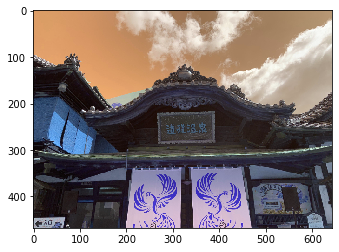

In [18]:
plt.imshow(target)

どうでしょうか。先ほどJupyterの外から見た画像と色の出方が異なりますね。    
これはOpenCVの標準的な色情報の持ち方とmatplotlibの持っている標準的な色情報の持ち方の違いが原因で引きおこる事象です    
    
通常matplotlibでは **R(赤), G(緑), B(青)** の順番で情報を保持していますが、    
OpenCVでは **B(青), G(緑), 赤(R)** の順番でデータを保持しています。    
    
どちらもただの3つの数列であるため、なにも加工しなくても画像情報を読むことができますが、認識する数値と色の組み合わせが異なるため、このような表示のズレが発生します。    
具体的には、赤色と青色が反転して表示されてしまいます。    
    
この表示色の変更については次の章で説明します。

# 2. 色モデル変換
この章では画像の簡単色加工を学びます。OpenCVには様々な色相パターンが事前に容易されており、ちょっと書くだけで様々なプリセット色相変換を楽しめます。    
もちろんご自身で色モデルを作成しを指定・変換することも可能ですが、少々コードが長くなってしまうことや別途数値計算や各色味の調整に時間がかかってしまうため、今回のハンズオンでは作業しません。   

うまく色相変換を利用して、おしゃれ画像加工に挑むことも可能ですよ！
    
今回は先ほど正しく表示されなかった画像を正しい色味で表示されるように調整を行いましょう。

## cvtColor
**cvtColor : 色モデル間変換を行う。変換する色モデルは定数として事前に容易されている。**    
cvtColor(【読み込む画像】, 【色相環定数】)    
    
使える色モデル定数例    

* COLOR_BGR2GRAY: BGR->グレースケール
* COLOR_BGR2RGB: BGR->RGB ([RGB色相環](https://ja.wikipedia.org/wiki/RGB))
* COLOR_BGR2HLS: BGR->HLS ([HLS色空間](https://ja.wikipedia.org/wiki/HLS%E8%89%B2%E7%A9%BA%E9%96%93))
* COLOR_BGR2HSV: BGR->HSV ([HSV色空間](https://ja.wikipedia.org/wiki/HSV%E8%89%B2%E7%A9%BA%E9%96%93))
* COLOR_BGR2YCrCb: BGR->YCrCb ([YUV色空間](https://ja.wikipedia.org/wiki/YUV))
* COLOR_BGR2XYZ: BGR->XYZ ([CIE1931色空間](https://ja.wikipedia.org/wiki/CIE_1931_%E8%89%B2%E7%A9%BA%E9%96%93))

ここではすべてBGR色モデルからの変換定数ばかりあげているが、もちろんHLSから、HSVからなどさまざまな変換定数が用意されている。

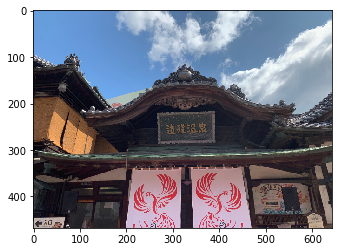

In [19]:
# RGB形式での画像表示
rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

ただしい色合いで表示されましたね。    
他の色モデルでの表示もやってみましょう。

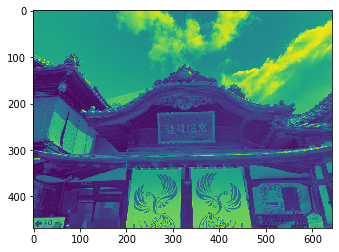

In [23]:
# グレースケール
gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

グレースケール設定をしたのにグレーで表示されませんね？

これも先ほどお話していたものと同じ原理で、BGRで色味情報を持っているか、RGBで色味情報を持っているかによる色置換の失敗です。

色味変換(色相変換)を行った際はBGRの順でデータを保持しています。このデータ保持のままで色がグレーに見えるように各値を保持していましたが、RGBで表示させようとしたため、結果緑フォーカスされた画像となってしまいました。

正しく表示させたい場合は同様にBGR2RGBで色相変換させて表示します。

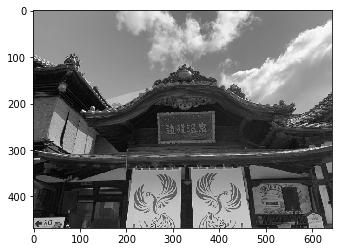

In [26]:
#正しい色味で表示しよう
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 3. 画像サイズの変更
画像が大きすぎると処理に困ったりしますよね。画像のサイズを変えて色々使いまわしたいタイミングはたくさんあると思います。

OpenCVでは画像のサイズを変更する場合は下記のように記載します。

## resize
**resize : 画像サイズの変更を行う**    
resize(【読み込む画像】, 【希望の大きさ(width, height)】) 

※他にも倍率で縮小・拡大ができる呼び出し方もあります。
※圧縮・拡大時の画像の歪み補完やデータの不足を補うオプションもあります。

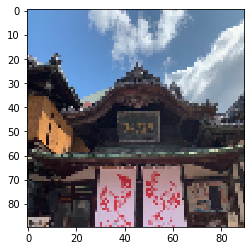

In [28]:
# 画像サイズを小さくしてみよう
small = cv2.resize(rgb, (90,90))

plt.imshow(small)

# 4. 顔判定と顔の差し替え
なんとなく画像編集の基礎がわかったところで、画像の分析をプラスして遊んでみましょう。

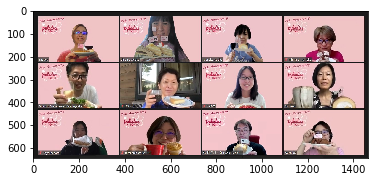

In [39]:
# 今回使う画像の読み込み
target = cv2.imread('image/party.jpeg')
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))

In [31]:
# 画像のグレースケール化
# グレースケール化することで画像内の情報量を落とし、顔判別に処理を集中させます(ノイズ軽減)
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

顔を判別させるためには顔の学習データが必要です。    
この学習データはGithub上で公開されていますので、利用したいものを取得しましょう。    
[https://github.com/opencv/opencv/tree/master/data](https://github.com/opencv/opencv/tree/master/data)    
    
今回はこのディレクトリにデータを持ってきてありますので、それを利用します。   

In [32]:
# 顔検出モデル読み込み
cascade_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [33]:
# 顔検出
rectangles = cascade_model.detectMultiScale(target_gray)

顔検出で取得したデータは下記の情報を含んでいます。
1. 顔検知範囲の左上角の座標
2. 顔の縦横の大きさ
    
![情報イメージ](../showcase2/display/example.jpg)

In [35]:
# 置き換える顔画像の読み込み
new_face = cv2.imread('image/mikan.png')

In [36]:
# さあみんな！新しい顔よ～！

for x, y, face_width, face_height in rectangles:
    # 顔のサイズに差し替える顔をリサイズ
    adjust_new_face = cv2.resize(new_face, (face_width, face_height))

    # 顔に新しい顔を上書き
    target[y: y+face_height, x: x+face_width] = adjust_new_face

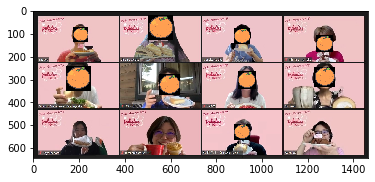

In [37]:
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))